# Section 5.3.2. Temperature penetration

IHE, Delft, , 2019-12-30

@T.N. olsthoorn

## This case relates to the exercises of section 5.3.3. of the syllabus

The conduction of head into the ground obeys the same governing partial differential equation as does flow in a 1D aquifer of infinite extent. We only have to replace head change $s$ by temperature $T$, $kD$ by the ease of heat flow $\lambda$ and storage $S$ by heat specifici capacity $\rho c$ of the medium inlcuding the water in it:

$$ \lambda \frac {\partial^2 T} {\partial x} = \rho c \frac {\partial T} {\partial t} $$

Given the as a boundary condition $T(0, t) = A \sin(\omega (t - \tau)) $, with delay $\tau$ a constant, henceis

$$ T(x, t) = A e^{-a x} \sin(\omega (t - \tau) - a x) $$

with $\omega T = 2 \pi$ and

$$ a = \sqrt{ \frac {\omega \rho c} {2 \lambda} } $$

Because heat is conducted and stored by both the water and the solid (particles) we have, with $\epsilon$ the porosity

$$ \lambda = \epsilon \lambda_w + (1 - \epsilon) \lambda_s $$
$$ \rho c = \epsilon \rho_w c_w - (1 - \epsilon) \rho_s c_s $$

We'll compute the penetration depth of temperature waves at ground surface with a cycle time of 1 d, 1w, 1 month, 1 year, 500 years. The latter may be releavant to detect climate change.

This solution presumes that the heat conductivity and heat capacity are constant from ground surface downward. If this is not the case, for instance because the first meters are unsaturate, then the problem may be split in two seprate ones and glued together at the water table (or rather the capillary fringe). This is a good exercise for the student. Moist sand will have a heat conductivity between 0.25 and 2 W/m/K depending on the water content. Also, the heat capacity has to be adopted to the actual moist content. 6% may be a good guess.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Convenience function to set up a graph

In [3]:
def newfig(title='?', xlabel='?', ylabel='?', xlim=None, ylim=None,
                   xscale='linear', yscale='linear', size_inches=(14, 8)):
    '''Setup a new axis for plotting'''
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)
    ax.grid(True)
    return ax

## Implementation

In [24]:
# Water and porous medium properties
rho_w = 1000 # kg/m3
rho_s = 2650 # kg/m3
c_w = 4018 # J/kg/K
c_s =  800 # J/kg/K
eps = 0.35 # porosity

# Merging the water with the porous medium to get overall properties
rhoc = eps * rho_w * c_w + (1 - eps) * rho_s * c_s # J/m3/K
lamb = 3 # W/m/K  (K = kelvin), mostly 2 - 4 (water + sand)
lamb_d = 86400 * lamb

A = 10.0 # K, temperature amplitude

## Plotting the envelopes in between which the temperature remains over time

The most practical information is the envelope of the waves belonging to the different cycle times

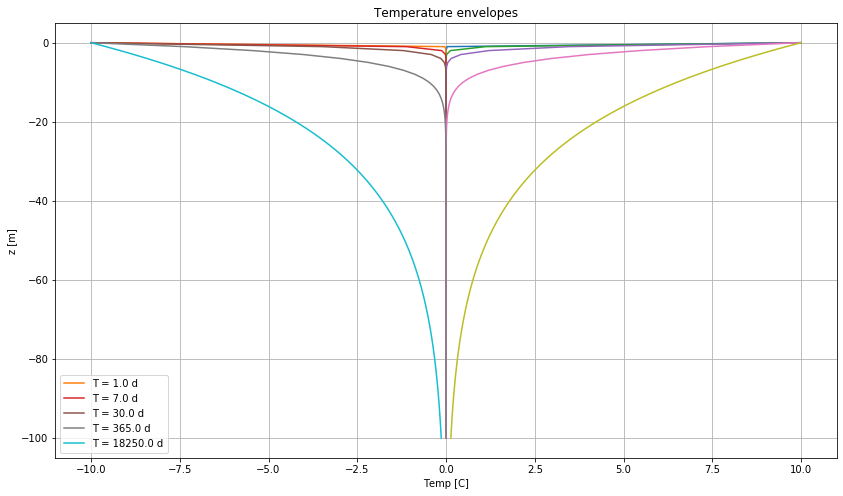

In [25]:
Times = np.array([1, 7, 30, 365, 50 * 365]) * 86400 # cycle times [d]
z = np.linspace(0, 100, 101)   # m

ax = newfig("Temperature envelopes", "Temp [C]", "z [m]")

# for each curve loop over t
for T in Times:
    omega = 2 * np.pi / T
    a = np.sqrt(omega * rhoc / (2 * lamb))
    y = A * np.exp(-a * z)
    ax.plot( y, -z)
    ax.plot(-y, -z, label="T = {:.1f} d".format(T / 86400))
    
ax.legend()
plt.show()

## Now assume all these waves wave simultaneously

If there are multiple fluctuations of temperature all behaving like a sine with their own frequency, and amplitude and initial value, we can show the total result by superimposing them

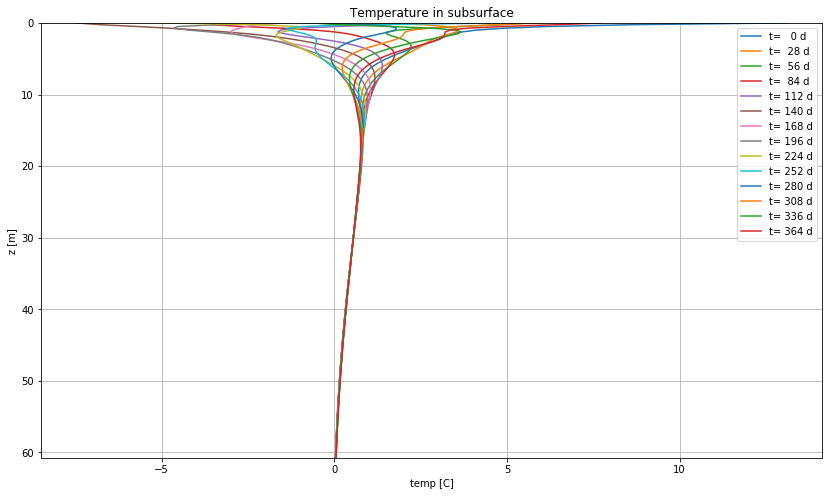

In [30]:
Tc = np.array([3., 11., 29, 365, 50 * 365]) # cycle times [d]
Ac = np.array([2., 5., 2.5,  5.,  2. ])
theta = np.array([0.2, 0.4, 0.5, 0.7, 0.9]) * np.pi

t = np.arange(0, 366, 4 * 7.)
x = np.arange(0, 61, 0.25)

ax = newfig('Temperature in subsurface', 'temp [C]', 'z [m]', ylim=(x[-1], x[0]))

for ti in t:
    s = np.zeros_like(x)
    for Tci, Ai, thetai in zip(Tc, Ac, theta):
        omega = 2 * np.pi  / Tci
        a = np.sqrt(omega * rhoc / (2 * lamb_d))
        #print(a, omega, Tci, Ai, thetai)
        s += Ai * np.exp(-a * x) * np.sin(omega * ti - a * x + thetai)
    ax.plot(s, x, label=f't={ti:4g} d')

ax.legend()


The highest frequency wave penetrates least deep.